In [348]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly_express as px

In [369]:
cd C:\Users\tejae\Insurance_PROJECT

C:\Users\tejae\Insurance_PROJECT


In [370]:
df=pd.read_csv("insurance.csv")

In [371]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# DataPreprocessing

In [372]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [373]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [374]:
columns=["sex","smoker","region","age","children"]
for col in columns:
    cat=df[col].unique()
    print(col,":",cat,"\n")
    

sex : ['female' 'male'] 

smoker : ['yes' 'no'] 

region : ['southwest' 'southeast' 'northwest' 'northeast'] 

age : [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 

children : [0 1 3 2 5 4] 



# Visualisation

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

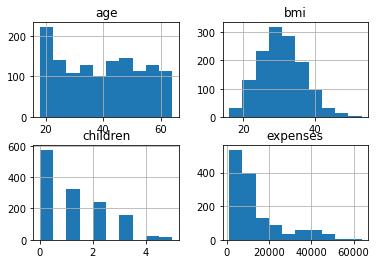

In [375]:
df.hist()

In [356]:
ageplt = pd.concat([df['expenses'],df['age']],axis=1)
px.scatter(ageplt,x='age',y='expenses')

if we closly observe expenses are incresing with as they are geting old

In [357]:
sexplt = pd.concat([df['expenses'],df['sex']],axis=1)
px.scatter(sexplt,x='sex',y='expenses')

In [358]:
bmiplt = pd.concat([df['expenses'],df['bmi']],axis=1)
px.scatter(bmiplt,x='bmi',y='expenses')

In [359]:
childrenplt = pd.concat([df['expenses'],df['children']],axis=1)
px.scatter(childrenplt,x='children',y='expenses')

In [360]:
plt = pd.concat([df['expenses'],df['smoker']],axis=1)
px.scatter(smokerplt,x='smoker',y='expenses')

Expenses increases who smokes.It effect on expenses label column

In [361]:
regionplt = pd.concat([df['expenses'],df['region']],axis=1)
px.scatter(regionplt,x='region',y='expenses')

<AxesSubplot:>

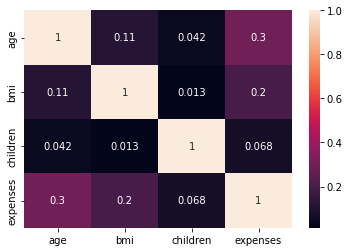

In [362]:
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True)

expenses as good corelation with age and bmi features

<AxesSubplot:xlabel='age'>

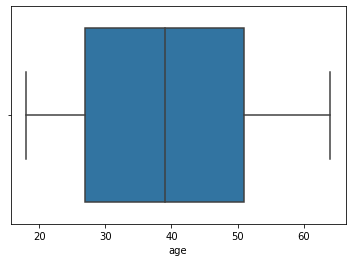

In [363]:
#Outliers
#columns=["age","bmi"]
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='bmi'>

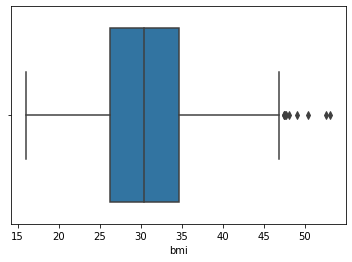

In [364]:
sns.boxplot(x=df["bmi"])

# Feature Engineering

In [376]:
df['smoker'] = df['smoker'].map({"no":0, "yes":1})
df['sex'] = df['sex'].map({"female":0, "male":1})

In [393]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [395]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(df[['region']]))
df.drop(columns=['region'], inplace=True)
df= pd.concat([df, encoded_data], axis=1, join='inner')

In [396]:
df

,age,sex,bmi,children,smoker,expenses,0,1,2
0,19,0,27.9,0,1,16884.92,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1.0,0.0,0.0
1334,18,0,31.9,0,0,2205.98,0.0,0.0,0.0
1335,18,0,36.9,0,0,1629.83,0.0,1.0,0.0
1336,21,0,25.8,0,0,2007.95,0.0,0.0,1.0


In [273]:
df=pd.get_dummies(df,columns=["region"],prefix=["region"])

In [274]:
df

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1


To escape dummy trap we remove one columns

In [275]:
df.drop(columns="region_northeast",axis=1,inplace=True)

In [276]:
df

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


<AxesSubplot:>

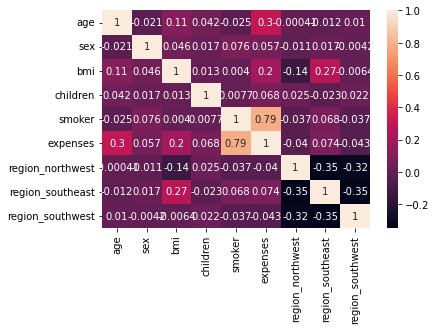

In [277]:
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True)

smoker has high correlation with sex

In [286]:
df1=df.copy()

here age and bmi has higher values than smoker and children

In [287]:
scaled=StandardScaler()

In [288]:
df1[["age","bmi"]]=scaled.fit_transform(df1[["age","bmi"]])
df1

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453646,0,1,16884.92,0,0,1
1,-1.509965,1,0.514186,1,0,1725.55,0,1,0
2,-0.797954,1,0.382954,3,0,4449.46,0,1,0
3,-0.441948,1,-1.306650,0,0,21984.47,1,0,0
4,-0.513149,1,-0.289606,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.054876,3,0,10600.55,1,0,0
1334,-1.509965,0,0.202511,0,0,2205.98,0,0,0
1335,-1.509965,0,1.022707,0,0,1629.83,0,1,0
1336,-1.296362,0,-0.798128,0,0,2007.95,0,0,1


In [289]:
df1.shape

(1338, 9)

In [290]:
y=df1[["expenses"]]
x= df1.drop('expenses', axis=1)
print(x.shape,y.shape)

(1338, 8) (1338, 1)


In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0               age  1.016641
1               sex  1.727619
2               bmi  1.089566
3          children  1.617262
4            smoker  1.234919
5  region_northwest  1.340547
6  region_southeast  1.461749
7  region_southwest  1.332922



# model building

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [293]:
print(X_train.shape, Y_train.shape)

(1003, 8) (1003, 1)


In [294]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [295]:
Y_pred=linear.predict(X_test)

In [297]:
linear.score(X_test, Y_test)

0.7672722578855357

In [307]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
cv= cross_val_score(dt, X_train, Y_train, cv=10)

In [308]:
cv

array([0.67307178, 0.78470598, 0.79343665, 0.73226899, 0.5690622 ,
       0.68792038, 0.57802705, 0.55132084, 0.67050095, 0.74286537])

In [309]:
cv.mean()

0.6783180175394812

In [310]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [311]:
dt.score(X_test, Y_test)

0.758638017319361

In [313]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
cv = cross_val_score(rfr, X_train, Y_train, cv=10)

C:\Users\tejae\AppData\Local\Temp/ipykernel_20672/3806952559.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\tejae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\tejae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\tejae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\tejae\anaconda3\lib\site-packages\s

In [319]:
print(cv)

[0.84382787 0.83884637 0.92523625 0.84522198 0.74790638 0.85294474
 0.71551014 0.76422071 0.81591584 0.84085165]


In [321]:
cv.mean()

0.8190481925577734

In [322]:
rfr.score(X_test, Y_test)

0.8488868528165636

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
cv = cross_val_score(gbr, X_train, Y_train, cv=10)
gbr.score(X_test, Y_test)

In [324]:
cv

array([0.87997163, 0.849164  , 0.94982459, 0.87527613, 0.79289937,
       0.86725825, 0.7402704 , 0.81136762, 0.85396445, 0.84204745])

In [325]:
cv.mean()

0.8462043878808837

In [327]:
linear_model=linear.score(X_test, Y_test)

In [328]:
dt_model=dt.score(X_test, Y_test)

In [329]:
randomforest_model=rfr.score(X_test, Y_test)

In [330]:
gbr_model=gbr.score(X_test, Y_test)

In [332]:
print(linear_model)
print(dt_model)
print(randomforest_model)
print(gbr_model)

0.7672722578855357
0.758638017319361
0.8488868528165636
0.8588571044393056


#gbr has better than the rest of the models

In [333]:
distributions  = {
    'learning_rate':[0.01,0.1,0.5,1],
    'loss':['ls','lad','huber'],
'criterion': ['mse', 'mae','friedman_mse'],
 'max_depth': [10,15, 20, 30],
 'max_features': ['auto'],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,4],
 'n_estimators': [30,70, 100, 130, 150]
}

In [335]:
from sklearn.model_selection import RandomizedSearchCV

In [337]:
RSC = RandomizedSearchCV(GradientBoostingRegressor(), distributions, random_state=0, n_iter=100, n_jobs=-1,verbose=3)
search = RSC.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\tejae\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [338]:
search.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'loss': 'lad',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [339]:
search.best_score_

0.8315380961167417

In [341]:
gbr=GradientBoostingRegressor(n_estimators= 110,min_samples_split=2,min_samples_leaf=4,max_features="auto",max_depth=30,loss="lad",learning_rate=0.1,criterion="friedman_mse")

In [342]:
gbr.fit(X_train,Y_train)

C:\Users\tejae\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(loss='lad', max_depth=30, max_features='auto',
                          min_samples_leaf=4, n_estimators=110)

In [343]:
gbr.score(X_test,Y_test)

0.8498386309030967

In [344]:
def adj_r2(x,y):
    r2 = gbr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [345]:
adj_r2(X_train, Y_train)

0.9034096887916323

In [346]:
adj_r2(X_test, Y_test)

0.8461536893301667

In [397]:
import pickle
with open('OneHotEncoder.sav','wb') as f:
    pickle.dump(encoder,f)
    
with open('GradientBoostingRegressor.sav','wb') as f:
    pickle.dump(gbr,f)